# DHARA KHAMAR - Case Study - Fast Food - McDonald's

## Problem Statement:
McDonald's aims to leverage market segmentation analysis using empirical data from a survey research dataset, originally collected for investigating brand image. The challenge is to identify and understand distinct consumer segments with varying perceptions of McDonald's. This includes determining if negative perceptions exist within specific segments and uncovering the key drivers behind such negativity.

## Objective:

- Segmentation Identification: Identify distinct consumer segments based on brand perceptions of McDonald's.
- Perception Analysis: Categorize segments into positive and negative perceptions for targeted strategies.
- Key Driver Identification: Analyze segments with negative perceptions to identify key drivers of dissatisfaction.
- Insightful Marketing Strategy: Provide actionable insights for tailored marketing strategies to strengthen positive perceptions or modify negative ones.
- Brand Enhancement: Enhance McDonald's brand management by addressing specific consumer segment perceptions effectively.

In [1]:
# Importing necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Exploring Dataset

In [2]:
# lets import and read the dataset
McD_df= pd.read_csv("mcdonalds.csv")
McD_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
McD_df.shape

(1453, 15)

In [4]:
McD_df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
McD_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


### Insights: 
- This quick glance at the data shows that the segmentation variables (perception of McDonald’s) are verbal, not numeric.
- This means that they are coded using the words YES and NO. This is not a suitable format for segment extraction. We need numbers, not words. To get numbers, we store the segmentation variables in a separate matrix, and convert them from verbal YES/NO to numeric binary.

### Solution:
- Extract the first eleven columns from the dataset, representing segmentation variables, and convert the data into a matrix. Identify "YES" entries, creating a logical matrix (TRUE/FALSE). Convert TRUE to 1 and FALSE to 0 by adding 0 to the logical matrix. Verify accuracy by examining the average values of transformed segmentation variables.

In [6]:
# Extract the first 11 columns and convert "Yes" to 1 and "No" to 0
MD_x = McD_df.iloc[:, 0:11].eq("Yes").astype(int)

# Calculate and round the column means
column_means = np.round(MD_x.mean(), 2)

print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


## PCA

- A perceptual map offers initial insights into how attributes are rated by respondents and, importantly, which attributes tend to be rated in the same way.
- Here, we calculate principal components because we use the resulting components to rotate and project the data for the perceptual map.

In [8]:
from sklearn.decomposition import PCA

# Perform PCA
MD_pca = PCA()
MD_pca_result = MD_pca.fit_transform(MD_x)

# Display the summary
print("Standard deviations (eigenvalues):", MD_pca.explained_variance_)
print("\nProportion of Variance Explained:", MD_pca.explained_variance_ratio_)
print("\nCumulative Proportion of Variance Explained:", MD_pca.explained_variance_ratio_.cumsum())
print("\nCumulative Proportion of Variance Explained:", np.round(MD_pca.explained_variance_ratio_.cumsum(), 1))

Standard deviations (eigenvalues): [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of Variance Explained: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Proportion of Variance Explained: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Cumulative Proportion of Variance Explained: [0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


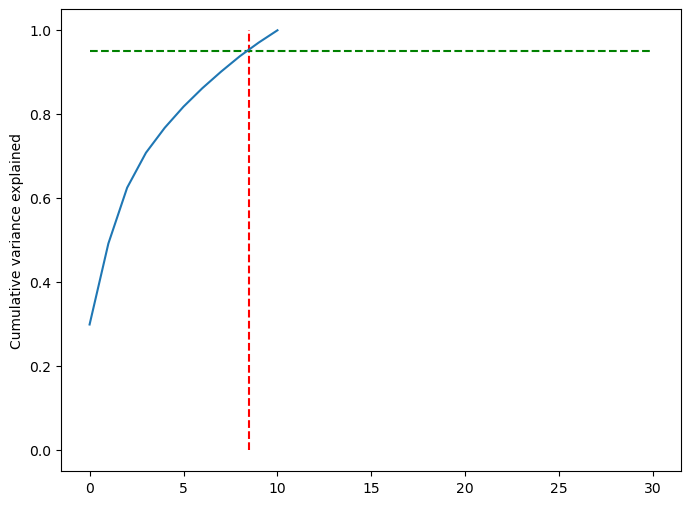

In [9]:
var_cumu = np.cumsum(MD_pca.explained_variance_ratio_) 

fig = plt.figure(figsize=[8,6])
plt.vlines(x=8.5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show() 

In [10]:
Col_names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pca_df = pd.DataFrame(data = MD_pca_result, columns = Col_names)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [11]:
#correlation coefficient between original variables and the  pca component

import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Create a DataFrame to store correlation coefficients
correlation_df = pd.DataFrame(index=MD_x.columns)
        
        
for i in range(MD_pca_result.shape[1]):
    correlations = [pearsonr(MD_x[column], MD_pca_result[:, i])[0] for column in MD_x.columns]
    correlation_df[f'PCA_{i+1}'] = correlations

# Display the correlation DataFrame
print(correlation_df)        


               PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
yummy      -0.725912  0.444290 -0.308868  0.044228 -0.208616  0.106507   
convenient -0.406280  0.034448 -0.108991 -0.196237  0.323612 -0.372868   
spicy      -0.016515  0.039213 -0.064112  0.270481  0.081778 -0.378124   
fattening   0.259180 -0.061002 -0.479134 -0.415987 -0.072950 -0.371514   
greasy      0.461446 -0.077641 -0.810647  0.202773  0.244135  0.130048   
fast       -0.273940 -0.176207 -0.108794 -0.129501  0.121457 -0.615351   
cheap      -0.520614 -0.756514 -0.153665  0.096754 -0.088751 -0.065331   
tasty      -0.745335  0.389794 -0.302677 -0.002121 -0.148580 -0.049830   
expensive   0.519456  0.761674  0.025672  0.056397 -0.002198 -0.169094   
healthy    -0.405174  0.116519  0.242701  0.762512  0.243221 -0.138487   
disgusting  0.661305 -0.197746 -0.104181  0.343515 -0.573503 -0.152514   

               PCA_7     PCA_8     PCA_9    PCA_10    PCA_11  
yummy      -0.163383  0.007213  0.305253 -0.0551

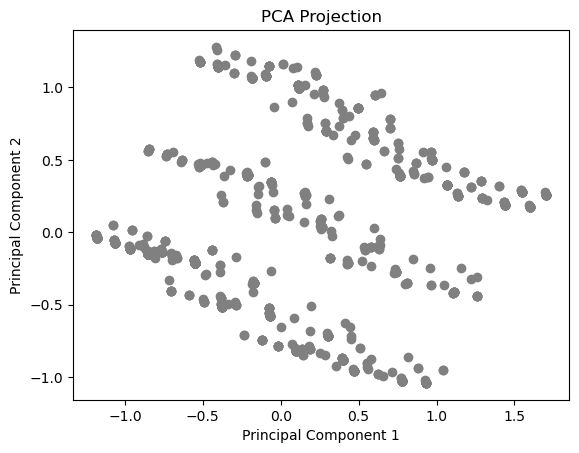

In [12]:
import matplotlib.pyplot as plt 

# Plot the projected points
plt.scatter(MD_pca_result[:, 0], MD_pca_result[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()

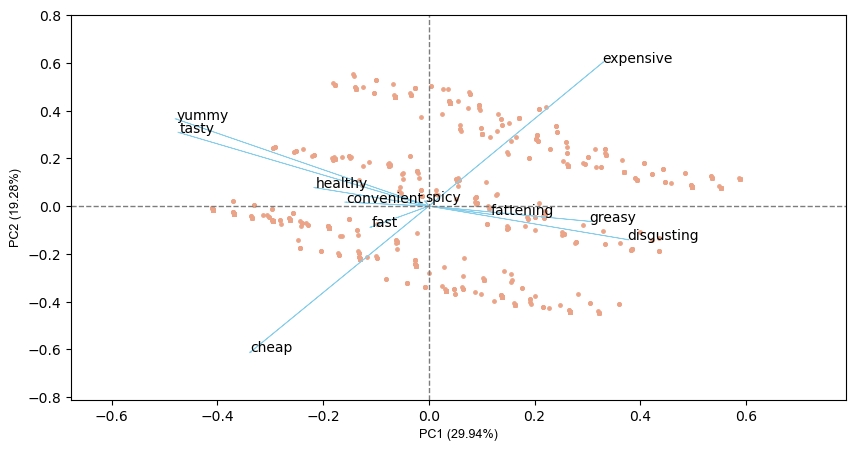

In [13]:
from bioinfokit.visuz import cluster

loadings = MD_pca.components_

# get 2D biplot
cluster.biplot(cscore=MD_pca_result, loadings=loadings, labels=McD_df.columns.values, var1=round(MD_pca.explained_variance_ratio_[0]*100, 2),
    var2=round(MD_pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

### Insights: 
- The attributes CHEAP and EXPENSIVE play a key role in the evaluation ofMcDonald’s, and these two attributes are assessed quite independently of the others. 
- The remaining attributes align with what can be interpreted as positive versus negative perceptions: FATTENING, DISGUSTING and GREASY point in the same direction in the perceptual chart, indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are also likely to view it as GREASY. 
- In the opposite direction are the positive attributes FAST, CONVENIENT, HEALTHY, as well as TASTY and YUMMY. 
- The observations along the EXPENSIVE versus CHEAP axis cluster around three values: a group of consumers at the top around the arrow pointing to CHEAP, a group of respondents

## Step 2: Extracting Segments

- In this section, we will use standard k-means analysis. 

In [14]:
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state
from sklearn.metrics import silhouette_score

# Set seed
random_state = check_random_state(1234)

# Specify the range of k values
k_values = range(2, 9)

# Perform k-means clustering for each k value and repeat 10 times
results = {}
silhouette_scores = []
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    labels = kmeans.fit_predict(MD_x)
    results[k] = {'kmeans': kmeans, 'labels': labels}
    silhouette_scores.append(silhouette_score(MD_x, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)
    

# Relabel clusters (assuming relabeling involves reordering cluster indices)
def relabel_clusters(labels):
    unique_labels = np.unique(labels)
    relabeled = np.zeros_like(labels)
    for i, unique_label in enumerate(unique_labels):
        relabeled[labels == unique_label] = i
    return relabeled

# Apply relabeling to the result with the optimal k
optimal_k = 4  # Replace with the optimal k from your analysis
optimal_result = results[optimal_k]
optimal_result['labels'] = relabel_clusters(optimal_result['labels'])

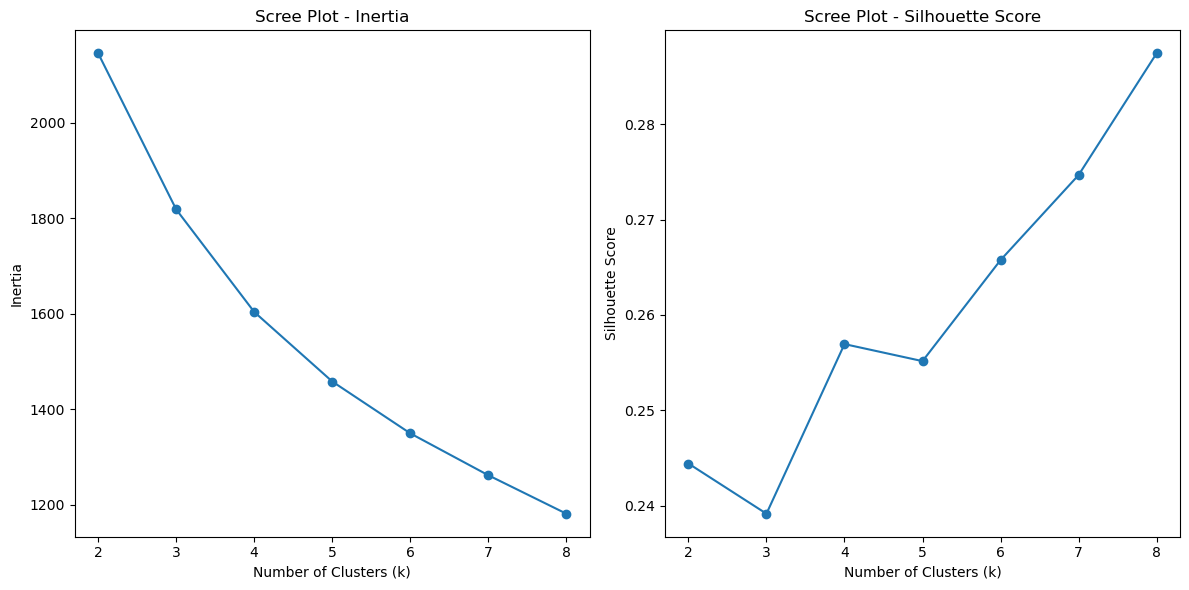

In [15]:

# Plotting the scree plot
plt.figure(figsize=(12, 6))

# Plotting the explained variance (inertia)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Scree Plot - Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Scree Plot - Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Insights: 
- The scree plot in Fig. A.2 has no distinct elbow: the sum of distances within market segments drops slowly as the number of market segments increases. 
- We expect the values to decrease because more market segments automatically mean that the segments are smaller and, as a consequence, that segment members are more similar to one another. 
- But the much anticipated point where the sum of distances drops dramatically is not visible. 
- This scree plot does not provide useful guidance on the number of market segments to extract.

In [16]:
!pip uninstall -y enum34

In [17]:
!pip install sklearn_extra

ERROR: Could not find a version that satisfies the requirement sklearn_extra (from versions: none)
ERROR: No matching distribution found for sklearn_extra


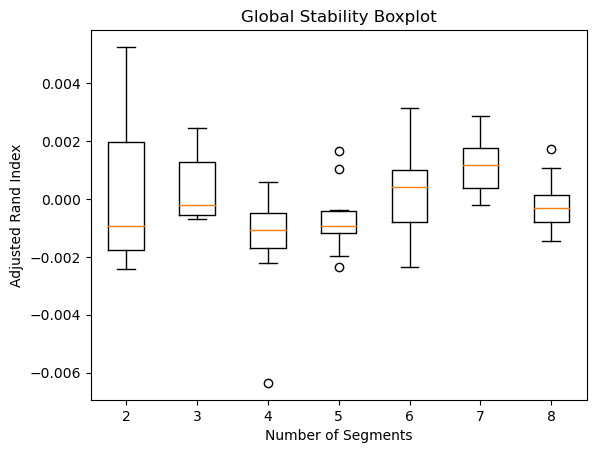

In [18]:

from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
#rom sklearn_extra.cluster import KMedoids  # KMedoids can be used as an alternative to KMeans

# a function `bootstrapped_kmeans` (defined later in the code)

def bootstrapped_kmeans(data, n_clusters, n_rep=10, n_boot=100):
    bootstrapped_scores = []
    for k in n_clusters:
        kmeans_scores = []
        for _ in range(n_rep):
            bootstrap_sample = resample(data, replace=True, n_samples=len(data))
#            kmeans = KMedoids(n_clusters=k)
#            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1)  # Use k-medoids initialization
            kmeans = KMeans(n_clusters=k, n_init=1)
            labels = kmeans.fit_predict(bootstrap_sample)
            true_labels = kmeans.fit_predict(data)
            score = adjusted_rand_score(true_labels, labels)
            kmeans_scores.append(score)
        bootstrapped_scores.append(kmeans_scores)
    return np.array(bootstrapped_scores)


# Specify parameters
n_clusters_range = range(2, 9)
n_replications = 10
n_bootstrap_samples = 100

# Perform global stability analysis
bootstrapped_results = bootstrapped_kmeans(MD_x, n_clusters_range, n_rep=n_replications, n_boot=n_bootstrap_samples)

# Plotting the global stability boxplot
plt.boxplot(bootstrapped_results.T, labels=n_clusters_range)
plt.title('Global Stability Boxplot')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.show()


### Insights:
- Inspecting above graph , points to the two-, three- and four-segment solutions as being quite stable. 
- However, the two- and three-segment solutions do not offer a very differentiated view of the market. 
- Solutions containing a small number of segments typically lack the market insights managers are interested in. 
- Once we increase the number of segments to five, average stability drops quite dramatically. 
- The foursegment solution thus emerges as the solution containing the most market segments which can still be reasonably well replicated if the calculation is repeated multiple times.

In [19]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=10)
kmeans.fit(MD_x)

kmeans.labels_ 

array([2, 3, 3, ..., 3, 1, 0])

In [20]:
# assign the label
MD_x['cluster_id'] = kmeans.labels_
MD_x.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_id
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2


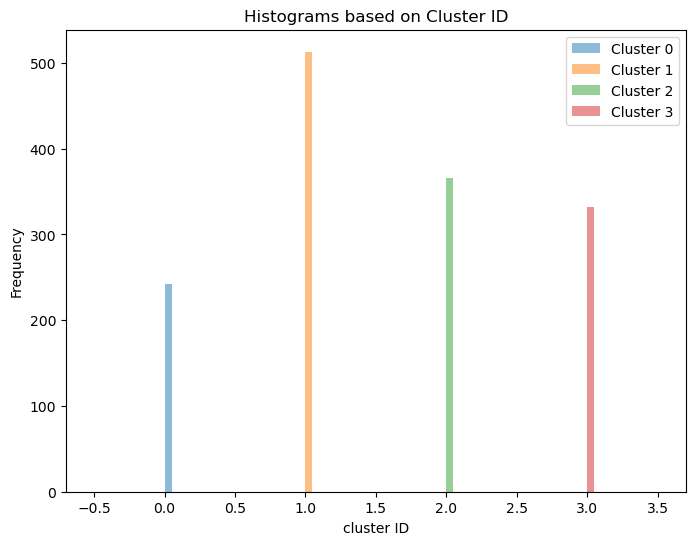

In [21]:
# Plot histograms for each cluster
plt.figure(figsize=(8, 6))

for cluster_label in range(0, 4):  # Assuming clusters are labeled from 1 to 4
    cluster_data = MD_x[MD_x['cluster_id'] == cluster_label]
    plt.hist(cluster_data['cluster_id'], bins=20, alpha=0.5, label=f'Cluster {cluster_label}')

plt.title('Histograms based on Cluster ID')
plt.xlabel('cluster ID')
plt.ylabel('Frequency')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


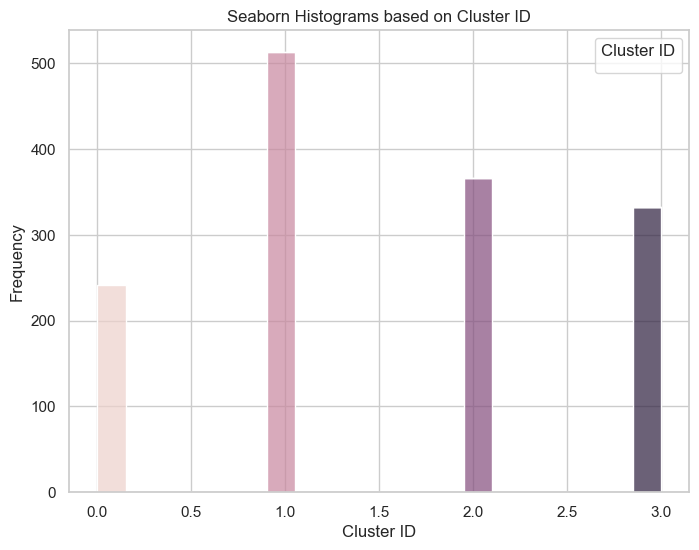

In [22]:
# Set the seaborn style
sns.set(style="whitegrid")

# Plot histograms for each cluster using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=MD_x, x='cluster_id', hue='cluster_id', bins=20, multiple='stack', alpha=0.7)
plt.title('Seaborn Histograms based on Cluster ID')
plt.xlabel('Cluster ID')
plt.ylabel('Frequency')
plt.legend(title='Cluster ID')
plt.show()

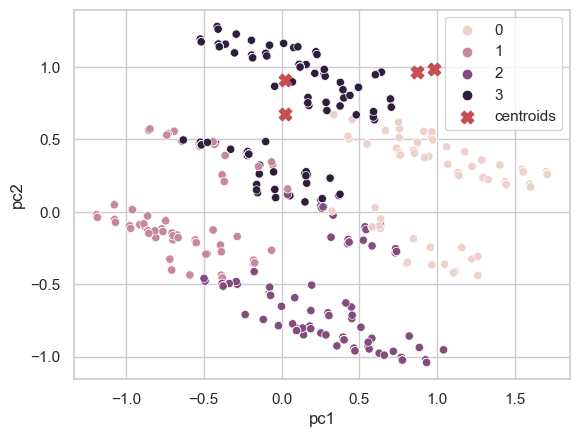

In [23]:
#Visulazing clusters
sns.scatterplot(data=pca_df, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Step 3: Profiling Segments

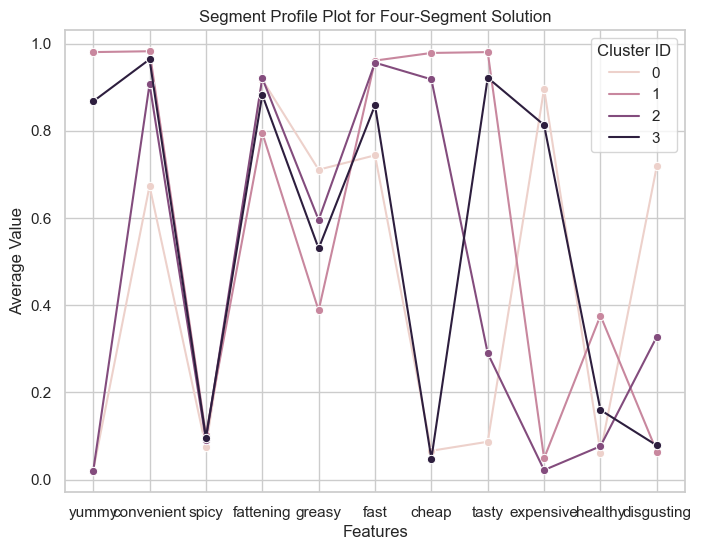

In [24]:

# Calculate mean values for each feature within each cluster
cluster_means = MD_x.groupby('cluster_id').mean().reset_index()

# Set the seaborn style
sns.set(style="whitegrid")

# Plot segment profile using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=cluster_means.melt(id_vars='cluster_id'), x='variable', y='value', hue='cluster_id', marker='o')
plt.title('Segment Profile Plot for Four-Segment Solution')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend(title='Cluster ID')
plt.show()


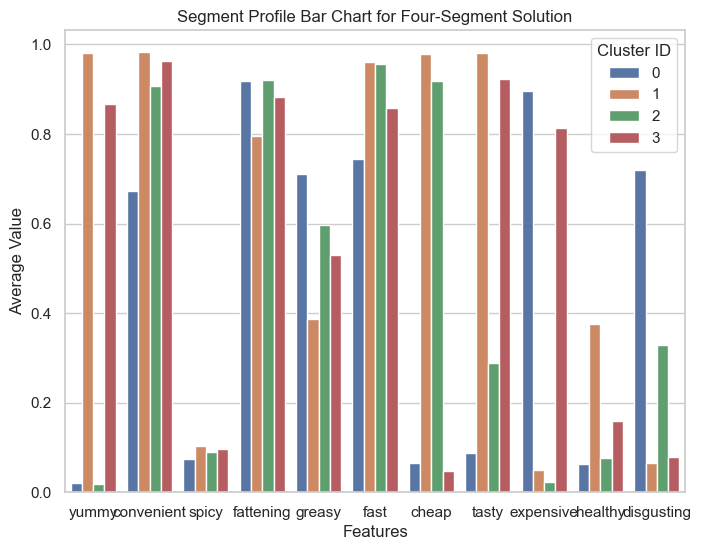

In [25]:
# Set the seaborn style
sns.set(style="whitegrid")

# Plot segment profile using seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_means.melt(id_vars='cluster_id'), x='variable', y='value', hue='cluster_id')
plt.title('Segment Profile Bar Chart for Four-Segment Solution')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend(title='Cluster ID')
plt.show() 

## Step 4: Describing Segments

In [26]:
# assign the label
McD_df['cluster_id'] = kmeans.labels_
McD_df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_id
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,2
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,3
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,3
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


In [27]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(McD_df['cluster_id'],McD_df['Like'])
crosstab 

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_id,,,,,,,,,,,
0,14,7,8,0,12,18,31,27,36,89,0
1,45,76,134,107,7,5,0,3,32,2,102
2,48,40,16,3,31,30,37,38,67,56,0
3,45,64,71,50,8,6,5,3,34,5,41


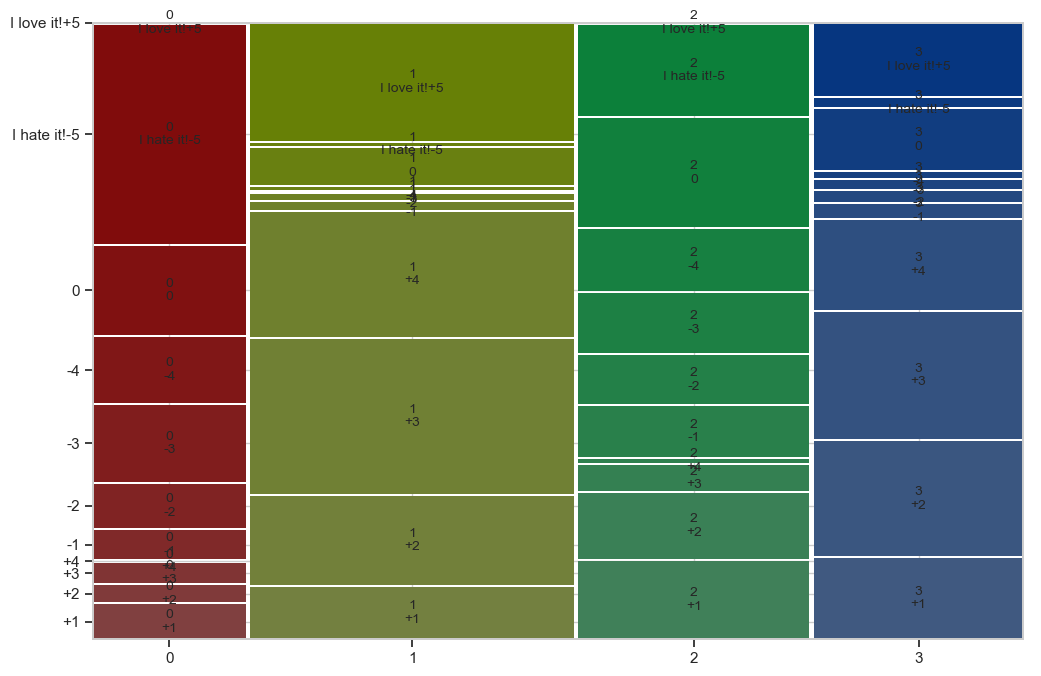

In [28]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (12,8)
mosaic(crosstab.stack())
plt.show()

### Insights: 
- The mosaic plot illustrates a significant association between segment number and feelings towards McDonald’s. 
- Segment 1 rarely expresses love for McDonald’s (top left in red), while segment 4 is more likely to love it (dark blue in top right). 
- Segment 2 exhibits strong negative feelings, with high hatred likelihood (dark blue at bottom) and minimal love (tiny boxes at the top of column two, then dark red).

In [29]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(McD_df['cluster_id'],McD_df['Gender'])
crosstab 

Gender,Female,Male
cluster_id,,
0,101,141
1,309,204
2,213,153
3,165,167


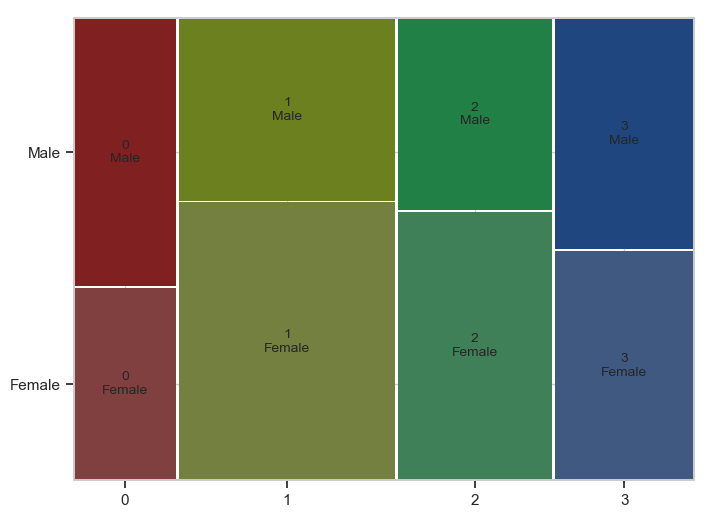

In [30]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (8,6)
mosaic(crosstab.stack())
plt.show()

### Insights: 
- The mosaic plot displays market segments on the x-axis and gender on the y-axis, revealing insights. 
- Segments 1 and 3 mirror the overall gender distribution. 
- Segment 2 has significantly more men (larger blue box in second column), while segment 4 is less likely to have men (smaller red box at the top of the fourth column).

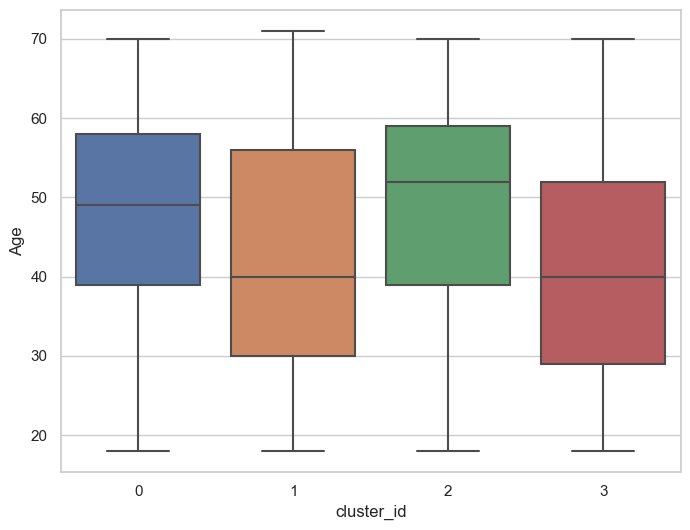

In [31]:
# plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_id', y='Age', data=McD_df)
plt.show()

### Insights: 
- The plot positions segments on the x-axis and age on the y-axis, indicating significant age differences. 
- Segment 3, valuing McDonald's taste but finding it expensive, stands out as younger than other segments. 
- This is evident in the lower position of its box and the non-overlapping notch in the middle compared to other segments.

## Step 8: Selecting (the) Target Segment(s)

In [32]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    McD_df[x] = LabelEncoder().fit_transform(McD_df[x])
    return McD_df

cat_var = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for var in cat_var:
    labelling(var)
McD_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_id
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,0
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,1


In [33]:
#Visit frequency
McD_df['VisitFrequency'] = LabelEncoder().fit_transform(McD_df['VisitFrequency'])
visit = McD_df.groupby('cluster_id')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_id,VisitFrequency
0,0,2.706612
1,1,2.614035
2,2,2.718579
3,3,2.536145


In [34]:
#Gender
McD_df['Gender'] = LabelEncoder().fit_transform(McD_df['Gender'])
Gender = McD_df.groupby('cluster_id')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_id,Gender
0,0,0.582645
1,1,0.397661
2,2,0.418033
3,3,0.503012


In [35]:
#Like
McD_df['Like'] = LabelEncoder().fit_transform(McD_df['Like'])
Like = McD_df.groupby('cluster_id')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_id,Like
0,0,6.714876
1,1,3.962963
2,2,5.144809
3,3,3.602410


In [36]:
segment = Gender.merge(Like, on='cluster_id', how='left').merge(visit, on='cluster_id', how='left')
segment

,cluster_id,Gender,Like,VisitFrequency
0,0,0.582645,6.714876,2.706612
1,1,0.397661,3.962963,2.614035
2,2,0.418033,5.144809,2.718579
3,3,0.503012,3.602410,2.536145


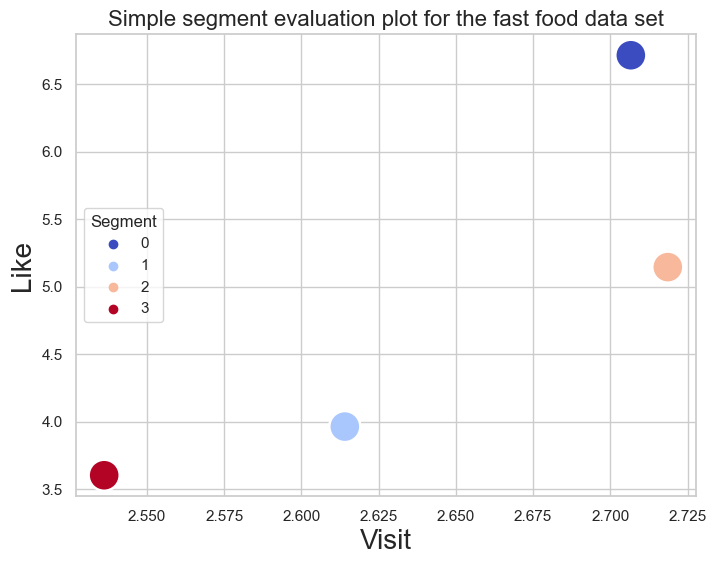

In [41]:
#Target segments
plt.figure(figsize = (8,6))
#sns.scatterplot(x = "VisitFrequency", y = "Like", data=segment, s=500, color="blue")
sns.scatterplot(x = "VisitFrequency", y="Like", data=segment, s=500, hue='cluster_id', palette='coolwarm')
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 16) 
plt.xlabel("Visit", fontsize = 20) 
plt.legend(title='Segment', loc='center left')
plt.ylabel("Like", fontsize = 20) 
plt.show()

### Insights: 
- The graph is a simplified segment evaluation plot. 
- Segments 0 and 2, deemed attractive, show a liking for and frequent visits to McDonald's. They should be retained and their needs addressed. 
- Segment 3 is the least attractive, with members disliking and rarely visiting McDonald's. 
- Segment 1, while currently negative, has potential, and marketing efforts could address its negative perceptions, making it a viable target to broaden McDonald's customer base.
